In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
train=pd.read_csv("titanic_train.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


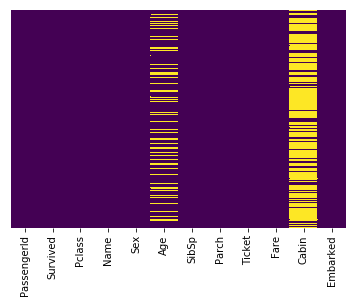

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
sns.set_style('whitegrid')

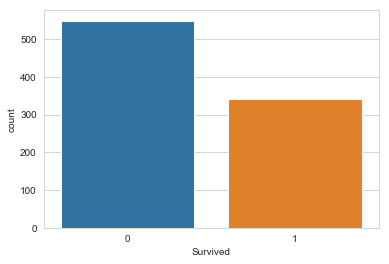

In [9]:
sns.countplot(x='Survived',data=train)

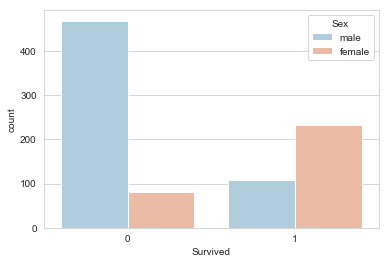

In [11]:
sns.countplot(x="Survived",hue="Sex",data=train,palette="RdBu_r")

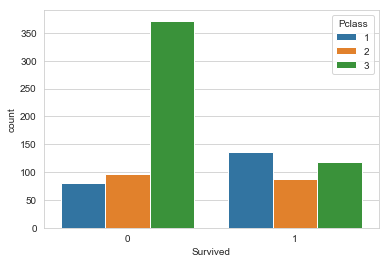

In [12]:
sns.countplot(x="Survived",hue="Pclass",data=train)

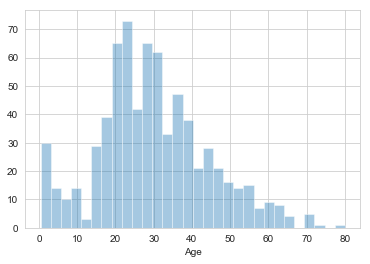

In [14]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

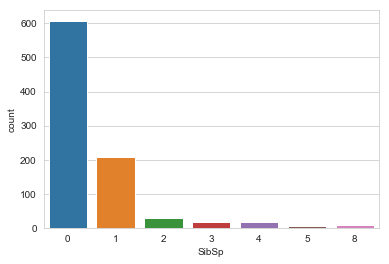

In [15]:
#we can use countplot to count the distribution of the values of a certain column,we can add hue to base that count on a certain catagory
sns.countplot(x="SibSp",data=train)

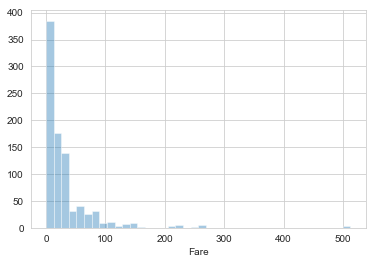

In [18]:
sns.distplot(train["Fare"],bins=40,kde=False)

In [19]:
import cufflinks as cf

In [20]:
cf.go_offline()

In [21]:
train["Fare"].iplot(kind='hist',bins=30)

In [23]:
sns.countplot(x="Survived",hue="Age",data=train,hue_order=5)

TypeError: 'int' object is not iterable

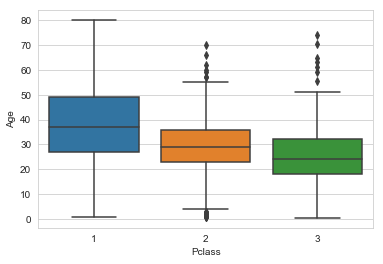

In [26]:
#plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass",y="Age",data=train)

In [31]:
#sns.countplot(x="Age",hue="Pclass",data=train,bins=100)

In [32]:
def impute_age(cols):
    age=cols[0]
    Pclass=cols[1]
    if pd.isnull(age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        if Pclass==3:
            return 24
    else:
        return age

In [33]:
train["Age"]=train[['Age','Pclass']].apply(impute_age,axis=1)

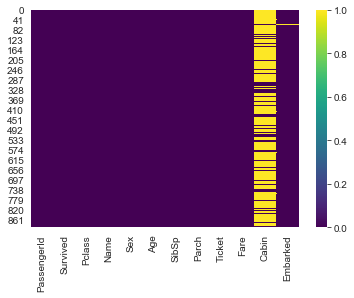

In [39]:
sns.heatmap(train.isnull(),cmap="viridis")#,yticklabels=False,cbar=False)

In [40]:
train.drop("Cabin",axis=1,inplace=True)

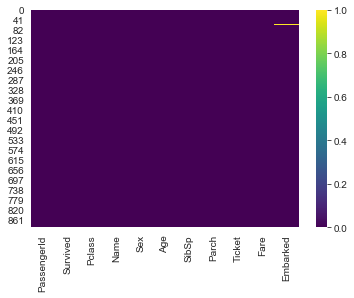

In [41]:
sns.heatmap(train.isnull(),cmap="viridis")


In [42]:
train.dropna(inplace=True)

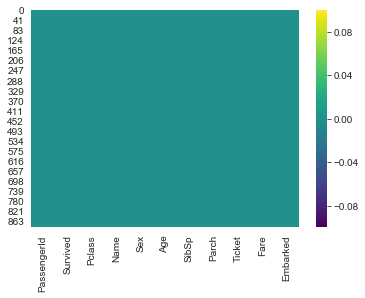

In [43]:
sns.heatmap(train.isnull(),cmap="viridis")


In [46]:
sex=pd.get_dummies(train["Sex"],drop_first=True)

In [47]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [48]:
train=pd.concat([train,sex,embark],axis=1)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [55]:
train.drop("PassengerId",axis=1,inplace=True)

In [56]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [59]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [60]:
X=train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
y=train["Survived"]

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=101)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logm=LogisticRegression()

In [66]:
logm.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
pred=logm.predict(X_test)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [70]:
from sklearn.metrics import confusion_matrix